# Reading a catalog in Julia

Should be easy enough, right? Try reading the CANDELS EGS catalog (~250 MB of whitespace separated values).

To introspect, `summary()` is a thing:

In [70]:
summary(1)

"Int64"

In [71]:
filename = "../hlsp_candels_hst_wfc3_egs-tot-multiband_f160w_v1_cat.txt"
summary(filename)

"String"

`using` makes a package's functions and types available without a prefix (c.f. Python's `from blah import *`). DataFrames has a DataFrame type and functions to read tables.

In [75]:
using DataFrames

Since there are column names in a custom format, pull them out and use them as `Symbol`s. The symbol `Symbol("foobar")` has the literal form `:foobar`, and we'll use them to refer to the columns later.

In [76]:
names = Array{Symbol}(523)
println("Initialized empty Symbol array")

Initialized empty Symbol array


In [54]:
f = open(filename)
for row in enumerate(take(eachline(f), 523))
    idx = row[1]
    line = row[2]
    names[idx] = Symbol(split(line)[3])
end
data_frame = readtable(f, names=names, separator=' ', )

,ID,IAU_designation,RA,DEC,RA_Lotz2008,DEC_Lotz2008,FLAGS,CLASS_STAR,CFHT_u_FLUX,CFHT_u_FLUXERR,CFHT_g_FLUX,CFHT_g_FLUXERR,CFHT_r_FLUX,CFHT_r_FLUXERR,CFHT_i_FLUX,CFHT_i_FLUXERR,CFHT_z_FLUX,CFHT_z_FLUXERR,ACS_F606W_FLUX,ACS_F606W_FLUXERR,ACS_F814W_FLUX,ACS_F814W_FLUXERR,WFC3_F125W_FLUX,WFC3_F125W_FLUXERR,WFC3_F140W_FLUX,WFC3_F140W_FLUXERR,WFC3_F160W_FLUX,WFC3_F160W_FLUXERR,WIRCAM_J_FLUX,WIRCAM_J_FLUXERR,WIRCAM_H_FLUX,WIRCAM_H_FLUXERR,WIRCAM_K_FLUX,WIRCAM_K_FLUXERR,NEWFIRM_J1_FLUX,NEWFIRM_J1_FLUXERR,NEWFIRM_J2_FLUX,NEWFIRM_J2_FLUXERR,NEWFIRM_J3_FLUX,NEWFIRM_J3_FLUXERR,NEWFIRM_H1_FLUX,NEWFIRM_H1_FLUXERR,NEWFIRM_H2_FLUX,NEWFIRM_H2_FLUXERR,NEWFIRM_K_FLUX,NEWFIRM_K_FLUXERR,IRAC_CH1_FLUX,IRAC_CH1_FLUXERR,IRAC_CH2_FLUX,IRAC_CH2_FLUXERR,IRAC_CH3_FLUX,IRAC_CH3_FLUXERR,IRAC_CH4_FLUX,IRAC_CH4_FLUXERR,ACS_F606W_V08_FLUX,ACS_F606W_V08_FLUXERR,ACS_F814W_V08_FLUX,ACS_F814W_V08_FLUXERR,WFC3_F125W_V08_FLUX,WFC3_F125W_V08_FLUXERR,WFC3_F160W_V08_FLUX,WFC3_F160W_V08_FLUXERR,IRAC_CH3_V08_FLUX,IRAC_CH3_V08_FLUXERR,IRAC_CH4_V08_FLUX,IRAC_CH4_V08_FLUXERR,ACS_F606W_FLUX_PHZ,ACS_F606W_FLUXERR_PHZ,ACS_F814W_FLUX_PHZ,ACS_F814W_FLUXERR_PHZ,WFC3_F125W_FLUX_PHZ,WFC3_F125W_FLUXERR_PHZ,WFC3_F140W_FLUX_PHZ,WFC3_F140W_FLUXERR_PHZ,WFC3_F160W_FLUX_PHZ,WFC3_F160W_FLUXERR_PHZ,DEEP_SPEC_Z,Limiting_Magnitude_UCFHTLS,Limiting_Magnitude_GCFHTLS,Limiting_Magnitude_RCFHTLS,Limiting_Magnitude_ICFHTLS,Limiting_Magnitude_ZCFHTLS,Limiting_Magnitude_F606W,Limiting_Magnitude_F814W,Limiting_Magnitude_F125W,Limiting_Magnitude_F140W,Limiting_Magnitude_F160W,Limiting_Magnitude_WIRCAMJ,Limiting_Magnitude_WIRCAMH,Limiting_Magnitude_WIRCAMK,Limiting_Magnitude_NMBSJ1,Limiting_Magnitude_NMBSJ2,Limiting_Magnitude_NMBSJ3,Limiting_Magnitude_NMBSH1,Limiting_Magnitude_NMBSH2,Limiting_Magnitude_NMBSK,Limiting_Magnitude_CH1,Limiting_Magnitude_CH2,Limiting_Magnitude_CH3,Limiting_Magnitude_CH4,Limiting_Magnitude_F606W_v08,Limiting_Magnitude_F814W_v08,Limiting_Magnitude_F125W_v08,Limiting_Magnitude_F160W_v08,Weight_UCFHTLS,Weight_GCFHTLS,Weight_RCFHTLS,Weight_ICFHTLS,Weight_ZCFHTLS,Weight_F606W,Weight_F814W,Weight_F125W,Weight_F140W,Weight_F160W,Weight_WIRCAMJ,Weight_WIRCAMH,Weight_WIRCAMK,Weight_NMBSJ1,Weight_NMBSJ2,Weight_NMBSJ3,Weight_NMBSH1,Weight_NMBSH2,Weight_NMBSK,Weight_CH1,Weight_CH2,Weight_CH3,Weight_CH4,Weight_F606W_08,Weight_F814W_08,Weight_F125W_08,Weight_F160W_08,Covariance_UCFHTLS,Covariance_GCFHTLS,Covariance_RCFHTLS,Covariance_ICFHTLS,Covariance_ZCFHTLS,Covariance_WIRCAMJ,Covariance_WIRCAMH,Covariance_WIRCAMK,Covariance_NMBSJ1,Covariance_NMBSJ2,Covariance_NMBSJ3,Covariance_NMBSH1,Covariance_NMBSH2,Covariance_NMBSK,Covariance_CH1,Covariance_CH2,Covariance_CH3,Covariance_CH4,FLUX_MAX_F606W,FLUX_MAX_F814W,FLUX_MAX_F125W,FLUX_MAX_F140W,FLUX_MAX_F160W,FLUX_MAX_F606W_08,FLUX_MAX_F814W_08,FLUX_MAX_F125W_08,FLUX_MAX_F160W_08,FLUX_ISO_F606W,FLUXERR_ISO_F606W,FLUX_ISO_F814W,FLUXERR_ISO_F814W,FLUX_ISO_F125W,FLUXERR_ISO_F125W,FLUX_ISO_F140W,FLUXERR_ISO_F140W,FLUX_ISO_F160W,FLUXERR_ISO_F160W,FLUX_ISO_F606W_08,FLUXERR_ISO_F606W_08,FLUX_ISO_F814W_08,FLUXERR_ISO_F814W_08,FLUX_ISO_F125W_08,FLUXERR_ISO_F125W_08,FLUX_ISO_F160W_08,FLUXERR_ISO_F160W_08,FLUX_ISOCOR_F606W,FLUXERR_ISOCOR_F606W,FLUX_ISOCOR_F814W,FLUXERR_ISOCOR_F814W,FLUX_ISOCOR_F125W,FLUXERR_ISOCOR_F125W,FLUX_ISOCOR_F140W,FLUXERR_ISOCOR_F140W,FLUX_ISOCOR_F160W,FLUXERR_ISOCOR_F160W,FLUX_ISOCOR_F606W_08,FLUXERR_ISOCOR_F606W_08,FLUX_ISOCOR_F814W_08,FLUXERR_ISOCOR_F814W_08,FLUX_ISOCOR_F125W_08,FLUXERR_ISOCOR_F125W_08,FLUX_ISOCOR_F160W_08,FLUXERR_ISOCOR_F160W_08,FLUX_AUTO_F606W,FLUXERR_AUTO_F606W,FLUX_AUTO_F814W,FLUXERR_AUTO_F814W,FLUX_AUTO_F125W,FLUXERR_AUTO_F125W,FLUX_AUTO_F140W,FLUXERR_AUTO_F140W,FLUX_AUTO_F160W,FLUXERR_AUTO_F160W,FLUX_AUTO_F606W_08,FLUXERR_AUTO_F606W_08,FLUX_AUTO_F814W_08,FLUXERR_AUTO_F814W_08,FLUX_AUTO_F125W_08,FLUXERR_AUTO_F125W_08,FLUX_AUTO_F160W_08,FLUXERR_AUTO_F160W_08,FLUX_PETRO_F606W,FLUXERR_PETRO_F606W,FLUX_PETRO_F814W,FLUXERR_PETRO_F814W,FLUX_PETRO_F125W,FLUXERR_PETRO_F125W,FLUX_PETRO_F140W,FLUXERR_PETRO_F140W,FL

Gadfly is a "grammar of graphics" style plotting package in the vein of R's `ggplot2`. (Though it's actually possible to use Python's matplotlib through a `PyPlot` Julia wrapper, if you prefer.)

In [77]:
using Gadfly

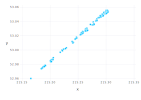

In [78]:
plot(x=data_frame[:RA][1:100], y=data_frame[:DEC][1:100])